Import Dataset

In [2]:
import pandas as pd

# Load your data
df = pd.read_csv('Fraud_Data.csv')
print(df.head())

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


Remove Signup Time and Purchase Time and Create Cleaned Data CSV

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Fraud_Data.csv')

# Convert the signup_time and purchase_time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Calculate the time difference in minutes
df['time_difference'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 60

# Drop the signup_time and purchase_time columns
df = df.drop(columns=['signup_time', 'purchase_time'])

# Save the modified DataFrame to a new CSV
df.to_csv('cleaned_data.csv', index=False)

Import Cleaned Data Set and Inspect

In [4]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667


Check the number of rows and columns in the data set

In [5]:
df.shape

(151112, 10)

Inspect Name and Data Type of Each Column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          151112 non-null  int64  
 1   purchase_value   151112 non-null  int64  
 2   device_id        151112 non-null  object 
 3   source           151112 non-null  object 
 4   browser          151112 non-null  object 
 5   sex              151112 non-null  object 
 6   age              151112 non-null  int64  
 7   ip_address       151112 non-null  float64
 8   class            151112 non-null  int64  
 9   time_difference  151112 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


Data Description for both numerical and categorical columns

In [7]:
df.describe(include='all')

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
count,151112.000000,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112.000000
unique,NaN,NaN,137956,3,5,2,NaN,NaN,NaN,NaN
top,NaN,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,60615,61432,88293,NaN,NaN,NaN,NaN
mean,200171.040970,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,82200.487477
std,115369.285024,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,52104.385307
min,2.000000,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,0.016667
25%,100642.500000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,36445.891667
50%,199958.000000,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,82105.758333
75%,300054.000000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,127408.741667


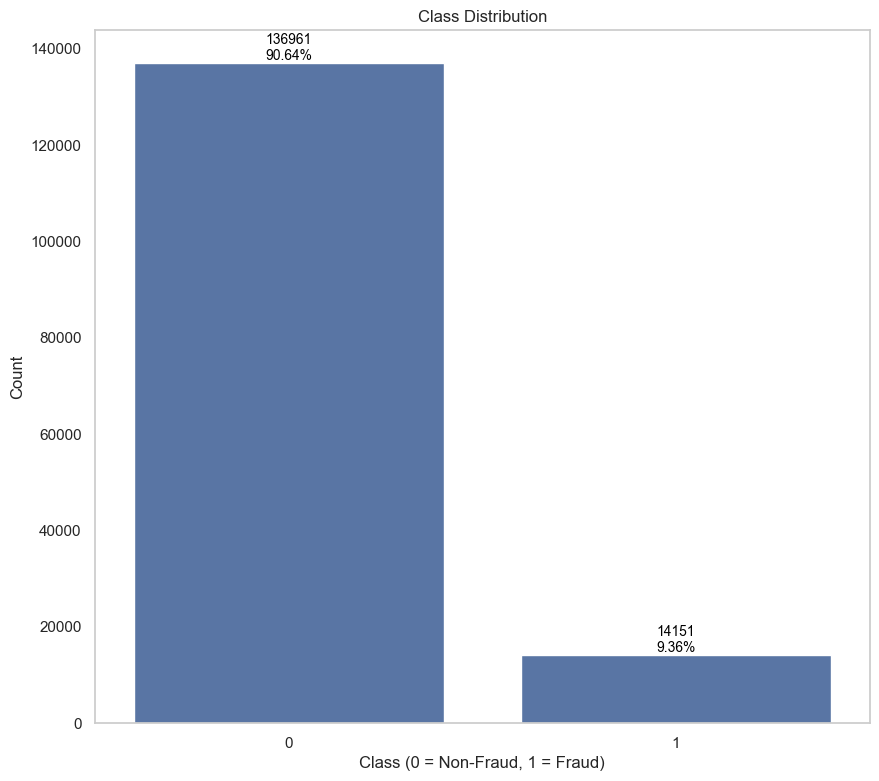

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'class' is the column name
plt.figure(figsize=(10, 9))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')

plt.grid(False)
# Calculate total count for percentages
total = len(df)

# Add data label with percentage and count
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f'{(count / total) * 100:.2f}%'
    plt.gca().annotate(f'{int(count)}\n{percentage}',  # Use int(count) to remove decimals
                       (p.get_x() + p.get_width() / 2, count), 
                       ha='center', va='bottom', fontsize=10, color='black')

plt.show()

/var/folders/sy/h_1p1n5n1jn4yzlw5d4ym9dm0000gn/T/ipykernel_54407/89565156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="purchase_value", palette="Set2")


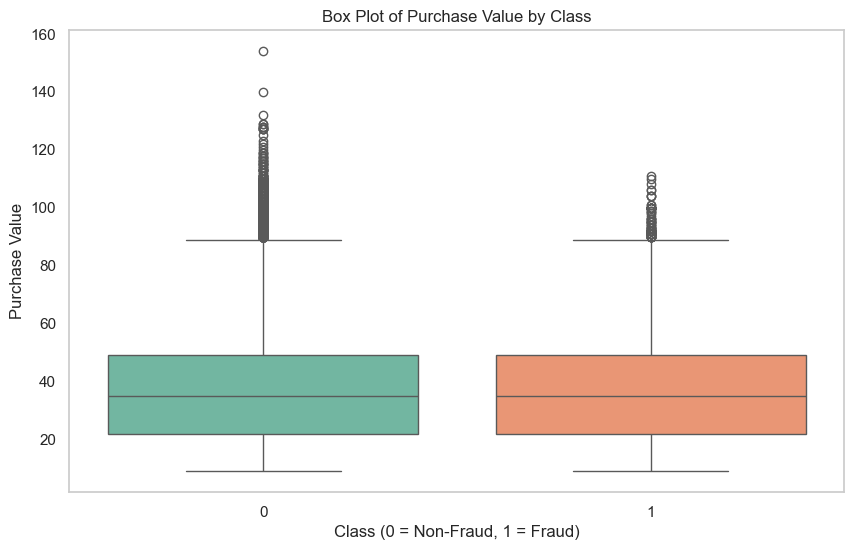

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style


# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="purchase_value", palette="Set2")
plt.grid(False)
# Labels and title
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Purchase Value")
plt.title("Box Plot of Purchase Value by Class")

# Show plot
plt.show()

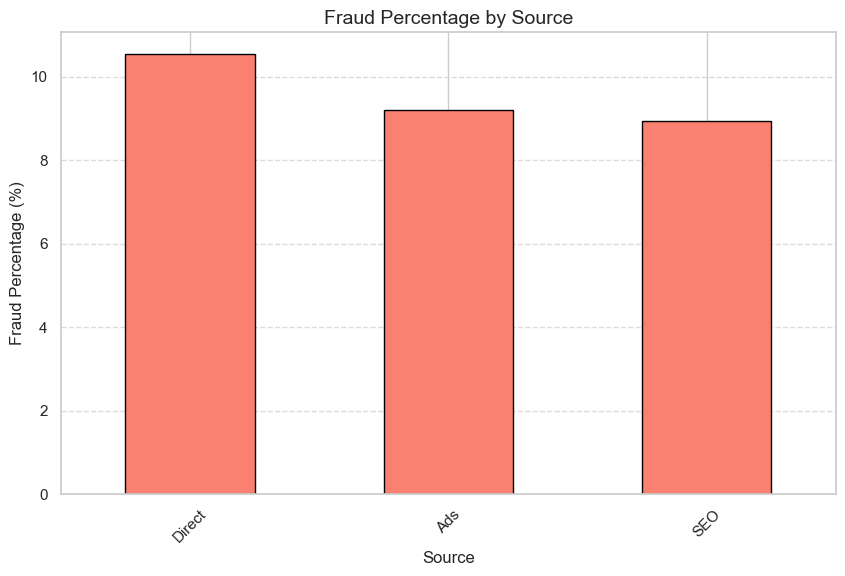

In [48]:
import matplotlib.pyplot as plt

# Calculate fraud percentage by source and sort in descending order
fraud_by_source = df.groupby('source')['class'].apply(lambda x: (x == 1).mean() * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
fraud_by_source.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Fraud Percentage by Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

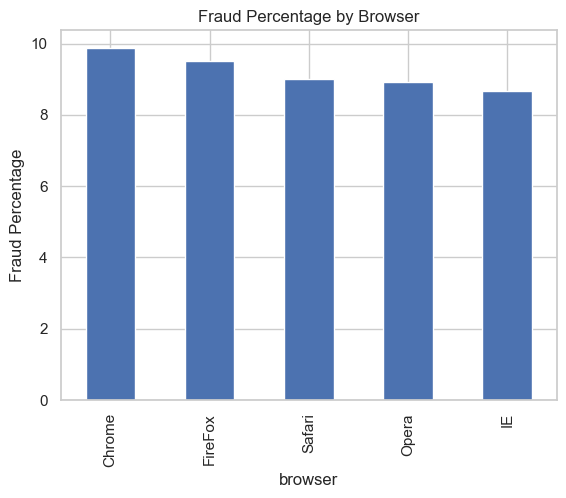

In [49]:
fraud_by_browser = df.groupby('browser')['class'].apply(lambda x: (x == 1).mean() * 100).sort_values(ascending=False)
fraud_by_browser.plot(kind='bar', title='Fraud Percentage by Browser')
plt.ylabel('Fraud Percentage')
plt.show()

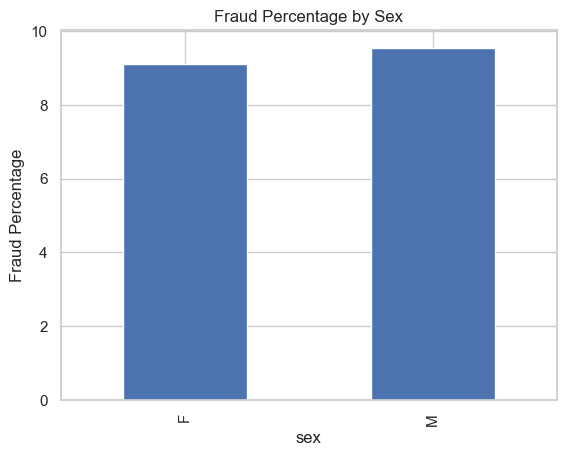

In [14]:
# Barplot for fraud by sex
fraud_by_sex = df.groupby('sex')['class'].apply(lambda x: (x == 1).mean() * 100)
fraud_by_sex.plot(kind='bar', title='Fraud Percentage by Sex')
plt.ylabel('Fraud Percentage')
plt.show()

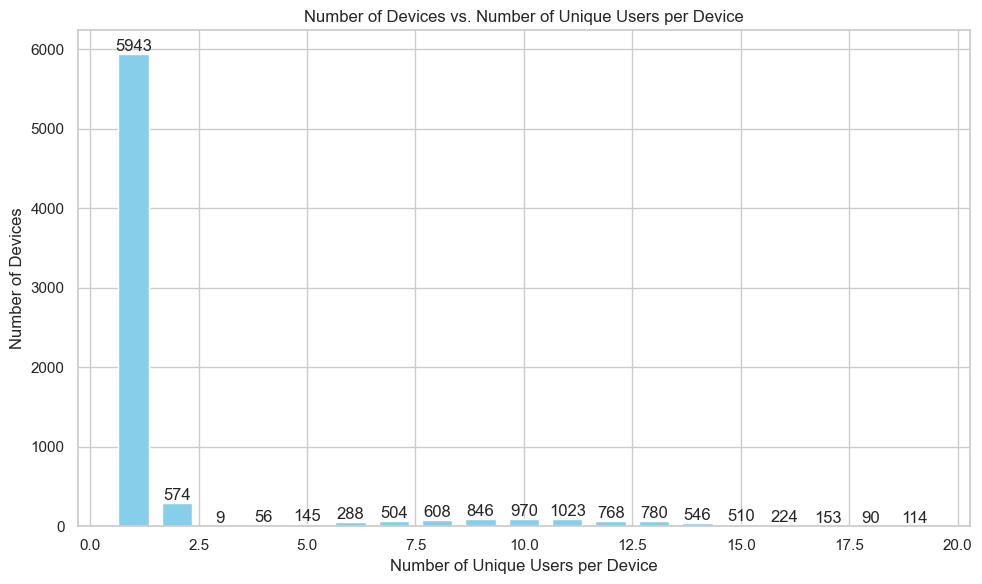

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for fraudulent transactions
fraud_df = df[df['class'] == 1]

# Group by device_id and count unique user_ids per device_id
device_user_count = fraud_df.groupby('device_id')['user_id'].nunique().reset_index(name='unique_user_count')

# Count how many devices have each number of unique user_ids
user_count_distribution = device_user_count['unique_user_count'].value_counts().sort_index()

# Count fraudulent transactions for each device (by device_id)
fraud_by_device = fraud_df.groupby('device_id').size().reset_index(name='fraud_count')

# Merge fraud_by_device with device_user_count to align the fraud counts with unique_user_count
fraud_transactions_per_user_count = fraud_by_device.merge(device_user_count, on='device_id')

# Group by the number of unique users per device and sum the fraud counts
fraud_transactions_per_user_count = fraud_transactions_per_user_count.groupby('unique_user_count').agg({'fraud_count': 'sum'}).reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.7

# Set the positions of the bars on the x-axis
x_positions = np.arange(len(user_count_distribution))

# Plot the number of devices (number of unique users per device) vs. number of devices
ax.bar(fraud_transactions_per_user_count['unique_user_count'], 
       user_count_distribution.values, 
       width=bar_width, 
       color='skyblue', 
       label='Number of Devices')

# Add the total fraudulent transactions as labels on the bars
for i, value in enumerate(user_count_distribution):
    fraud_count = fraud_transactions_per_user_count[fraud_transactions_per_user_count['unique_user_count'] == fraud_transactions_per_user_count['unique_user_count'].iloc[i]]['fraud_count'].values[0]
    ax.text(fraud_transactions_per_user_count['unique_user_count'].iloc[i], 
            value + 0.2, 
            str(fraud_count), 
            ha='center', 
            va='bottom', 
            fontsize=12)

# Set labels and title
ax.set_xlabel('Number of Unique Users per Device')
ax.set_ylabel('Number of Devices')
ax.set_title('Number of Devices vs. Number of Unique Users per Device')

# Adjust label spacing to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

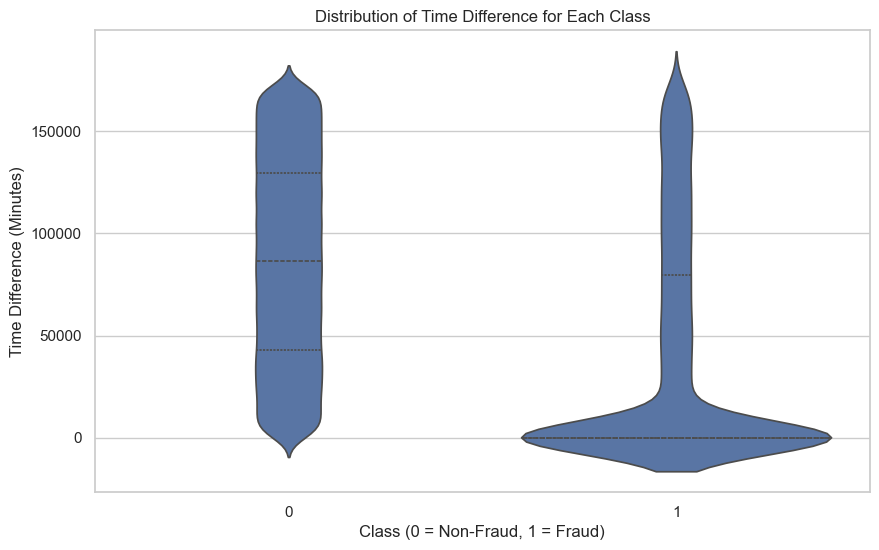

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='time_difference', data=df, inner="quartile")
plt.title('Distribution of Time Difference for Each Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Time Difference (Minutes)')
plt.show()

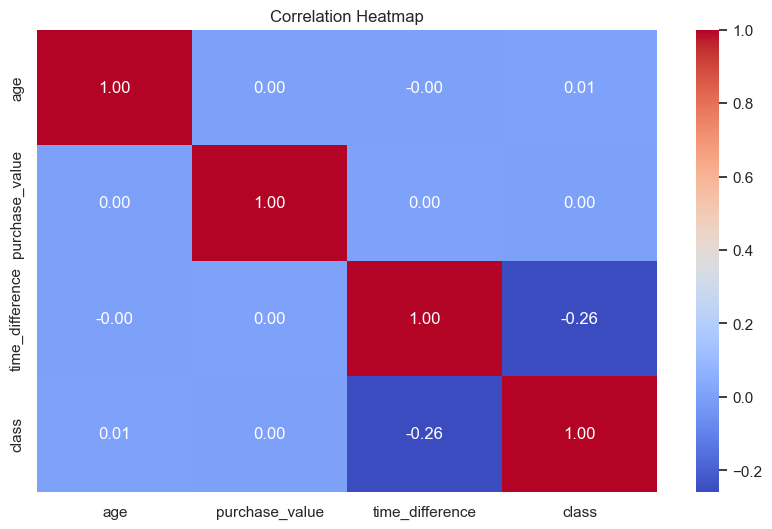

In [19]:
# Correlation heatmap
correlation_matrix = df[['age', 'purchase_value', 'time_difference', 'class']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()